In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ff = pd.read_pickle(r'data/flat_features.pickle')
pd.set_option('display.max_columns', None)

In [1]:
ff

NameError: name 'ff' is not defined

In [13]:
ff.iloc[0].index

Index(['HeadX_feat', 'HeadY_feat', 'NeckX_feat', 'NeckY_feat',
       'SpineShoulderX_feat', 'SpineShoulderY_feat', 'SpineMidX_feat',
       'SpineMidY_feat', 'SpineBaseX_feat', 'SpineBaseY_feat',
       'ShoulderRightX_feat', 'ShoulderRightY_feat', 'ShoulderLeftX_feat',
       'ShoulderLeftY_feat', 'ElbowRightX_feat', 'ElbowRightY_feat',
       'ElbowLeftX_feat', 'ElbowLeftY_feat', 'WristRightX_feat',
       'WristRightY_feat', 'WristLeftX_feat', 'WristLeftY_feat',
       'HandRightX_feat', 'HandRightY_feat', 'HandLeftX_feat',
       'HandLeftY_feat', 'HipRightX_feat', 'HipRightY_feat', 'HipLeftX_feat',
       'HipLeftY_feat', 'label'],
      dtype='object')

In [4]:
def row_to_feature_points_for_plotting(row: pd.Series):

    feat_cols = list(row.index)
    feat_cols.remove('label')
    key_points = ['HeadX_feat', 'HeadY_feat', 'SpineBaseX_feat', 'SpineBaseY_feat', 
                  'HipRightX_feat', 'HipRightY_feat', 'HipLeftX_feat', 'HipLeftY_feat']
    
    nxs = [row[col] for col in feat_cols if col[-6] == 'X' and col not in key_points] 
    nys = [row[col] for col in feat_cols if col[-6] == 'Y' and col not in key_points]
    kxs = [row[col] for col in key_points if col[-6] == 'X']
    kys = [row[col] for col in key_points if col[-6] == 'Y']

    return {'normal_point_xs': nxs, 'normal_point_ys': nys, 
            'key_point_xs': kxs, 'key_point_ys': kys}

In [5]:
def show_me_beautiful_people(pose = 1, case = 0, legend_loc = "lower right", path_to_image = "", data_row = None):
    if data_row is None:
        xy = row_to_feature_points_for_plotting(ff[ff.label == pose].iloc[case])
    else:
        xy = row_to_feature_points_for_plotting(data_row)
    plt.scatter(xy['normal_point_xs'], xy['normal_point_ys'], color='blue', label='joints')
    plt.scatter(xy['key_point_xs'][2:4], xy['key_point_ys'][2:4], color='green', label='hor. ref. points')
    plt.scatter(xy['key_point_xs'][0:2], xy['key_point_ys'][0:2], color='red', label='vert. ref. points')
    plt.grid(alpha=0.5)
    leg = plt.legend(loc=legend_loc)
    leg.get_frame().set_edgecolor("black")
    if data_row is None:
        plt.title(f"Example of inner-normalized point coordinates:\npose {pose}, case {case}")
    else:
        plt.title(f"Example of inner-normalized point coordinates:\npose {int(data_row.label)}, data index {data_row.name}")
    plt.xlabel('x distance from spin base / hip length')
    plt.ylabel('y distance from spin base / spin to head height')
    if path_to_image != "":
        plt.savefig(path_to_image, dpi=150)
    plt.show()
 

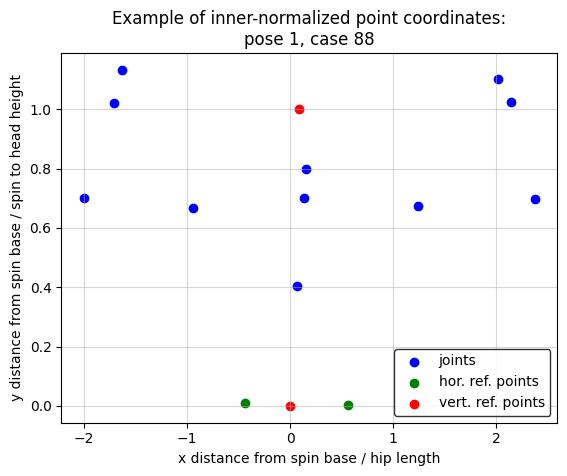

In [162]:
show_me_beautiful_people(1, 88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_1_case_88.jpg")

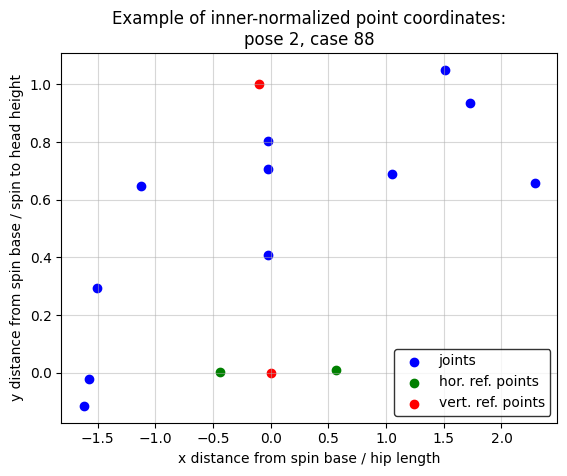

In [163]:
show_me_beautiful_people(2, 88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_2_case_88.jpg")

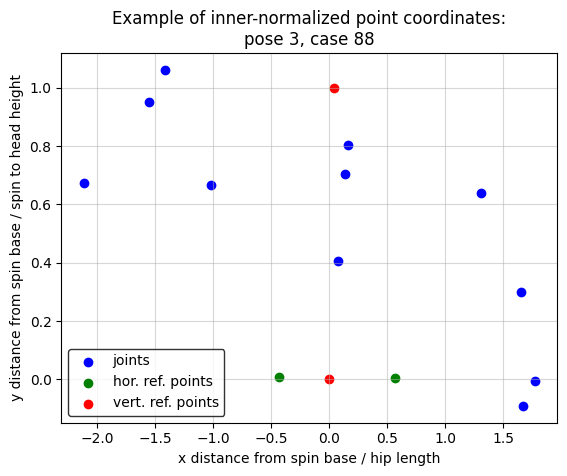

In [169]:
show_me_beautiful_people(3, 88, legend_loc="lower left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_3_case_88.jpg")

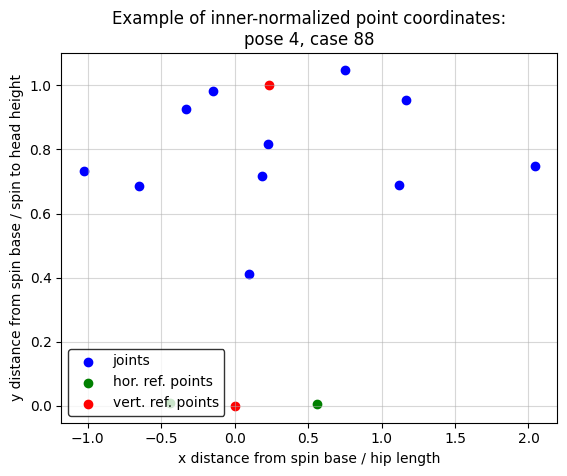

In [170]:
show_me_beautiful_people(4, 88, legend_loc="lower left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_4_case_88.jpg")

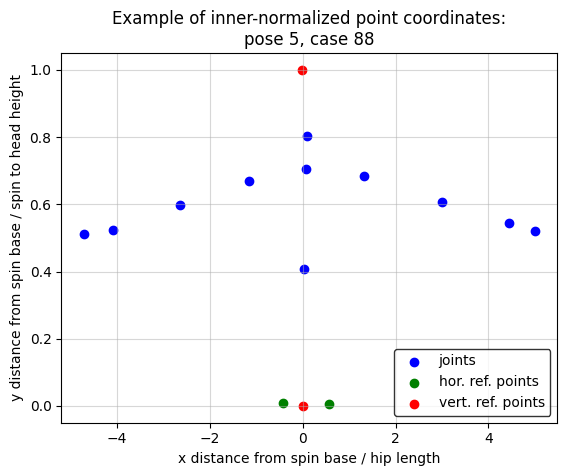

In [164]:
show_me_beautiful_people(5, 88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_5_case_88.jpg")

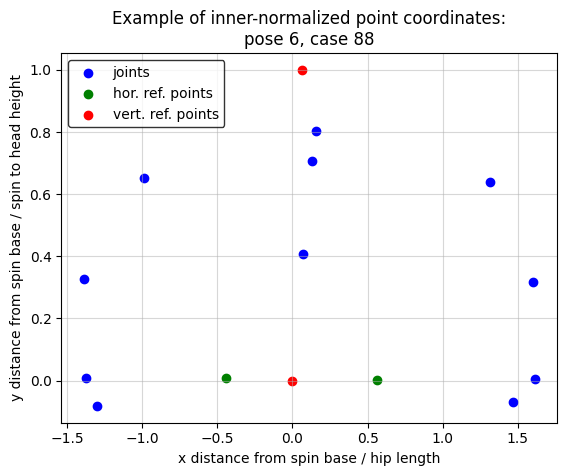

In [165]:
show_me_beautiful_people(6, 88, legend_loc="upper left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_6_case_88.jpg")

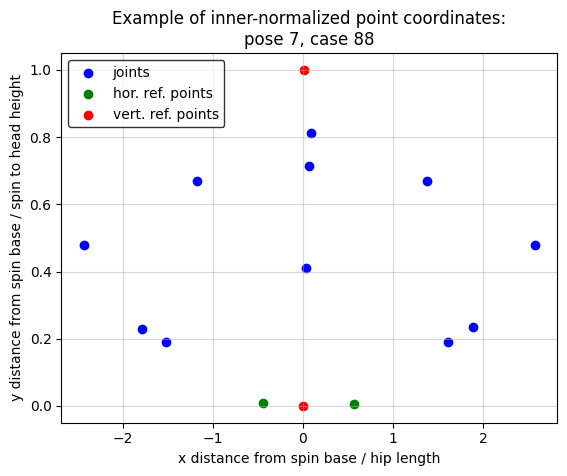

In [167]:
show_me_beautiful_people(7, 88, legend_loc="upper left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_7_case_88.jpg")

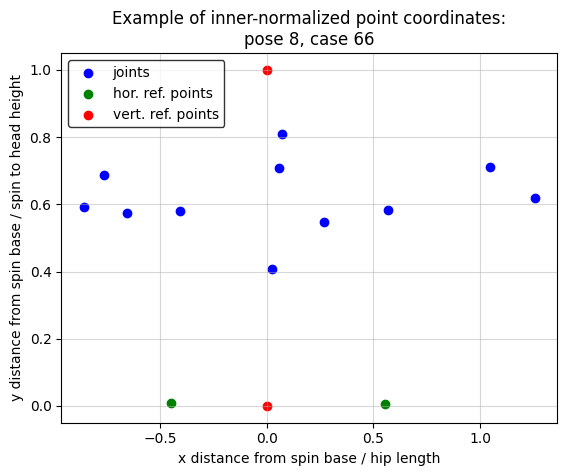

In [168]:
show_me_beautiful_people(8, 66, legend_loc="upper left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_pose_8_case_88.jpg")

In [6]:
fl = pd.read_pickle(r'data/flat.pickle')

In [7]:
fl.columns

Index(['HeadX', 'HeadY', 'NeckX', 'NeckY', 'SpineShoulderX', 'SpineShoulderY',
       'SpineMidX', 'SpineMidY', 'SpineBaseX', 'SpineBaseY', 'ShoulderRightX',
       'ShoulderRightY', 'ShoulderLeftX', 'ShoulderLeftY', 'ElbowRightX',
       'ElbowRightY', 'ElbowLeftX', 'ElbowLeftY', 'WristRightX', 'WristRightY',
       'WristLeftX', 'WristLeftY', 'HandRightX', 'HandRightY', 'HandLeftX',
       'HandLeftY', 'HipRightX', 'HipRightY', 'HipLeftX', 'HipLeftY', 'label'],
      dtype='object')

In [8]:
flat_elbows_ys = [fl[fl.label == 6].ElbowRightY.to_list() + fl[fl.label == 6].ElbowLeftY.to_list(),
                  fl[fl.label == 7].ElbowRightY.to_list() + fl[fl.label == 7].ElbowLeftY.to_list()]
norm_elbows_ys = [ff[ff.label == 6].ElbowRightY_feat.to_list() + ff[ff.label == 6].ElbowLeftY_feat.to_list(),
                  ff[ff.label == 7].ElbowRightY_feat.to_list() + ff[ff.label == 7].ElbowLeftY_feat.to_list()]

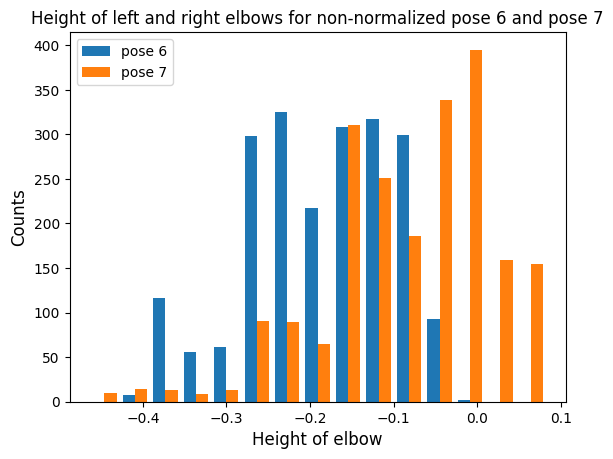

In [9]:
plt.hist(flat_elbows_ys, bins=15, label=['pose 6', 'pose 7'])
plt.title(f"Height of left and right elbows for non-normalized pose 6 and pose 7")
leg = plt.legend(loc='upper left')
leg.get_frame().set_edgecolor("black")
plt.xlabel("Height of elbow", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend()
plt.savefig(r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\flat_ElbowLeftY-ElbowRightY_label_6_label_7.jpg", dpi=150)
plt.show()

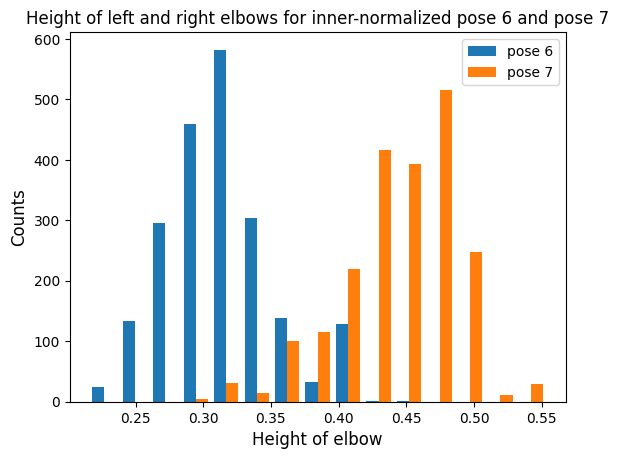

In [10]:
plt.hist(norm_elbows_ys, bins=15, label=['pose 6', 'pose 7'])
plt.title(f"Height of left and right elbows for inner-normalized pose 6 and pose 7")
leg = plt.legend(loc='upper left')
leg.get_frame().set_edgecolor("black")
plt.xlabel("Height of elbow", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend()
plt.savefig(r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\feature_flat_ElbowLeftY_feat-ElbowRightY_feat_label_6_label_7.jpg", dpi=150)
plt.show()

In [11]:
ff[(ff.label == 6) & (
                      (ff.ElbowRightY_feat > 0.43) | (ff.ElbowLeftY_feat > 0.43) 
                     )]

,HeadX_feat,HeadY_feat,NeckX_feat,NeckY_feat,SpineShoulderX_feat,SpineShoulderY_feat,SpineMidX_feat,SpineMidY_feat,SpineBaseX_feat,SpineBaseY_feat,ShoulderRightX_feat,ShoulderRightY_feat,ShoulderLeftX_feat,ShoulderLeftY_feat,ElbowRightX_feat,ElbowRightY_feat,ElbowLeftX_feat,ElbowLeftY_feat,WristRightX_feat,WristRightY_feat,WristLeftX_feat,WristLeftY_feat,HandRightX_feat,HandRightY_feat,HandLeftX_feat,HandLeftY_feat,HipRightX_feat,HipRightY_feat,HipLeftX_feat,HipLeftY_feat,label
5283,0.468936,1.0,0.367983,0.812346,0.321634,0.712649,0.182316,0.409533,0.0,0.0,1.312012,0.659958,-0.746205,0.724552,1.600187,0.341034,-1.611233,0.460796,1.476028,0.044840,-1.519406,0.162518,1.267904,0.027690,-1.292238,0.116097,0.514816,-0.006588,-0.485184,0.017407,6.0
5318,0.381246,1.0,0.311371,0.819286,0.273092,0.718797,0.157906,0.413031,0.0,0.0,1.263048,0.666521,-0.830411,0.719206,1.620853,0.356440,-1.686440,0.460480,1.443846,0.068719,-1.441819,0.158677,1.202238,0.063308,-1.186922,0.100820,0.514974,-0.003206,-0.485026,0.014127,6.0


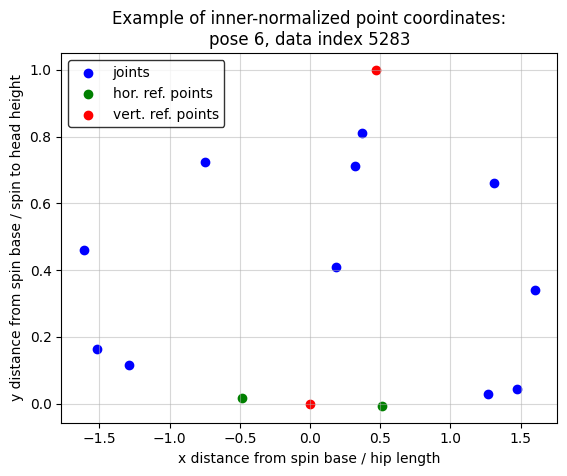

In [18]:
show_me_beautiful_people(data_row=ff.iloc[5283], legend_loc="upper left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_outlier_pose_6_case_5283.jpg")

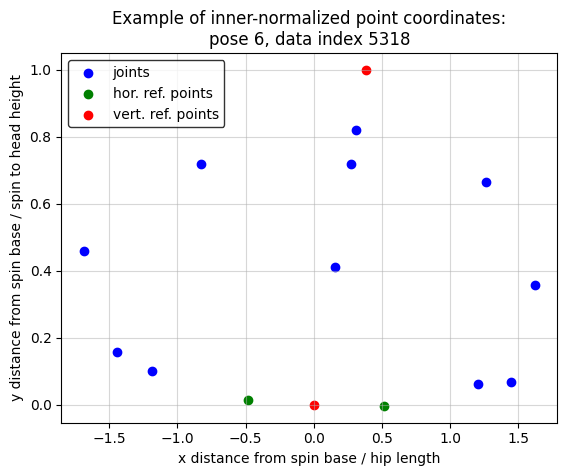

In [19]:
show_me_beautiful_people(data_row=ff.iloc[5318], legend_loc="upper left", path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\inner_norm_outlier_pose_6_case_5318.jpg")